## Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Read in SNP genotype data using read_csv function

In [2]:
SNP_data = pd.read_csv("~/data/rawdata/matrix_1kg.txt",
                       sep = "\t")

SNP_data

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Convert dataframe into numbers only

In [3]:
SNP_data_nums = SNP_data._get_numeric_data()
SNP_data_nums_only = SNP_data_nums.drop('POS', axis = 1)
SNP_data_nums_only

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Calculate alternate allele count

In [4]:
alt_allele_count = SNP_data_nums_only.sum(axis = 1)
alt_allele_count

0         2
1        98
2        17
3        11
4         2
       ... 
9995    105
9996      1
9997      7
9998    147
9999     13
Length: 10000, dtype: int64

## Determine total number of chromosomes

In [5]:
SNP_data_nums_only.shape[1]

2548

## Calculate alternate allele frequency

alt allele freq = total # of counts of alt alleles / total number chromosomes (# of samples x 2)

In [6]:
alt_allele_freq = SNP_data_nums_only.sum(axis = 1) / (2 * 2548)
alt_allele_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

## Plot allele frequency spectrum

### (histogram of allele frequencies across SNPs)

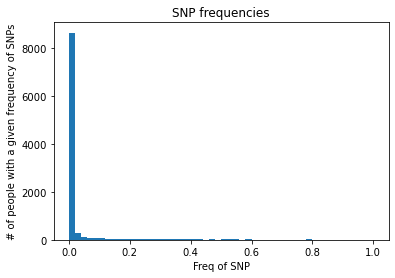

In [7]:
fig, ax = plt.subplots()
ax.hist(alt_allele_freq, bins=50)
plt.title("SNP frequencies")
plt.xlabel("Freq of SNP")
plt.ylabel("# of people with a given frequency of SNPs")
plt.show()

#x = freq of SNP; most SNP only occur in 0.0 - 0.01% of population
#y = number of people with that number of SNP
#(ex. 8000 ppl have unique SNPs (present in <0.1% of the population) 

## Subset data frame to only include common SNPs (alternate allele frequency between 0.05 and 0.95)

In [8]:
common_SNPs = (alt_allele_freq > 0.05) & (alt_allele_freq < 0.95)
common_SNPs

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

## Filter the dataframe containing only SNP numbers so that it outputs only common SNPs

In [10]:
result = SNP_data_nums_only.loc[common_SNPs, :]
result

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


## Transpose this data frame (swap x and y axes)

In [ ]:
result = result.T
result

## Standardize data frame using so that variance = ~0 

In [12]:
result_standardized = StandardScaler().fit_transform(result)
result_standardized

array([[-0.79867196,  0.58089207,  0.5940045 , ..., -0.76443308,
        -0.74813075, -0.85118482],
       [ 0.56612969,  1.95441625,  0.5940045 , ...,  0.59364082,
         0.62553205, -0.85118482],
       [-0.79867196,  0.58089207,  1.96564018, ...,  1.95171473,
        -0.74813075,  0.48949926],
       ...,
       [-0.79867196,  0.58089207,  0.5940045 , ..., -0.76443308,
        -0.74813075, -0.85118482],
       [ 1.93093133,  0.58089207, -0.77763118, ...,  1.95171473,
         1.99919484,  1.83018334],
       [-0.79867196, -0.79263211, -0.77763118, ..., -0.76443308,
        -0.74813075, -0.85118482]])

## Check that new means ~0 and new variances = 1

In [13]:
result_standardized.mean(axis = 0)

array([5.40473683e-18, 4.68410526e-17, 1.89165789e-17, ...,
       5.40473683e-17, 3.96347368e-17, 7.20631578e-17])

In [14]:
result_standardized.var(axis = 0)

array([1., 1., 1., ..., 1., 1., 1.])

## Specify that we would like to store the top 10 principal components in pca_output

In [17]:
pca = PCA(n_components = 10)
type(pca)

sklearn.decomposition._pca.PCA

## Convert pca input to pca output using pca.fit_transform 

In [18]:
pca_output = pca.fit_transform(result_standardized)
pca_output

array([[-2.95221701e+01, -5.60105219e+00, -7.20595475e-01, ...,
        -1.12478293e+00, -3.35323599e-02, -6.85759046e-01],
       [ 3.91462413e+01,  1.09531688e+01, -1.16261181e+00, ...,
         9.37824556e-01, -1.31195999e+00, -7.53900768e+00],
       [ 1.47955790e+01, -1.16822898e+01, -1.37819172e+01, ...,
         3.47349845e+00,  1.20328801e+00,  1.14812721e-01],
       ...,
       [-1.59690633e+01, -7.51214305e+00, -1.12964901e+01, ...,
         3.57231966e-01,  7.20720977e-01,  6.68806256e-02],
       [ 6.81560975e+01,  1.29484539e+01, -8.63480131e+00, ...,
        -7.12881336e-01, -3.40325644e+00, -3.37497809e+00],
       [-2.97437189e+01, -1.08452193e+01, -1.38866866e+01, ...,
         5.60684695e-01,  6.90516081e-01,  6.56504672e-01]])

## Check that rows = number of input samples and columns = pca #

In [19]:
pca_output.shape

(986, 10)

## Do PCA, specify column names

In [20]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-29.522170,-5.601052,-0.720595,3.487697,-2.814278,-1.552198,-1.692158,-1.124783,-0.033532,-0.685759
1,39.146241,10.953169,-1.162612,12.149371,-3.608180,-0.265368,-0.540302,0.937825,-1.311960,-7.539008
2,14.795579,-11.682290,-13.781917,6.718522,-6.232816,-1.941269,-2.313586,3.473498,1.203288,0.114813
3,-28.710794,10.761703,1.662463,0.236812,-0.232599,-0.746983,-0.252079,0.969438,-0.494496,0.306694
4,-27.677408,0.252304,-6.879186,1.133778,-2.446262,-0.066418,0.254688,-0.243617,0.445898,-0.267623
...,...,...,...,...,...,...,...,...,...,...
981,72.731743,11.678752,4.676753,2.736954,5.338225,-3.167803,-1.589670,0.075149,-1.955580,-1.838912
982,-24.406647,-9.693273,-2.584671,-1.650838,-3.521537,3.267451,0.131369,-0.150397,-0.104503,1.286566
983,-15.969063,-7.512143,-11.296490,-0.731066,-4.627250,2.344978,-1.480684,0.357232,0.720721,0.066881
984,68.156097,12.948454,-8.634801,0.637817,10.756961,-7.167288,-0.100603,-0.712881,-3.403256,-3.374978


## Plot samples on P1 and P2

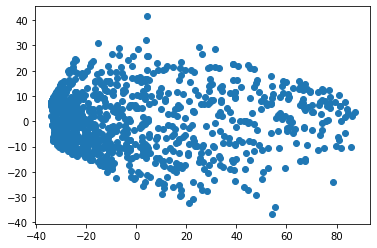

In [21]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])